In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

import os
import numpy as np
import matplotlib.pyplot as plt
import file_loading
from scipy.interpolate import Rbf
from multiprocessing import Pool
from astropy.io import ascii

from forecast import build_interp_zack
from forecast import findlevel
from forecast import plot_cube


In [2]:

# PS cubes
c1 = np.load( 'cubes/' + '1ngal40' + '_PS.npy' )
c2 = np.load( 'cubes/' + '2all5redshifts' + '_PS.npy' )
c3 = np.load( 'cubes/' + '3all5redshifts-highl' + '_PS.npy'  )
# PC cubes
c4 = np.load( 'cubes/' + '1ngal40' + '_PC.npy' )
c5 = np.load( 'cubes/' + '2all5redshifts' + '_PC.npy' )
# c6 = c2 + c5

c7 = np.load( 'cubes/' + 'onlygalaxies' + '_PS.npy' )
# c8 = np.load( 'cubes/' + 'onlygalaxies' + '_PC.npy' )

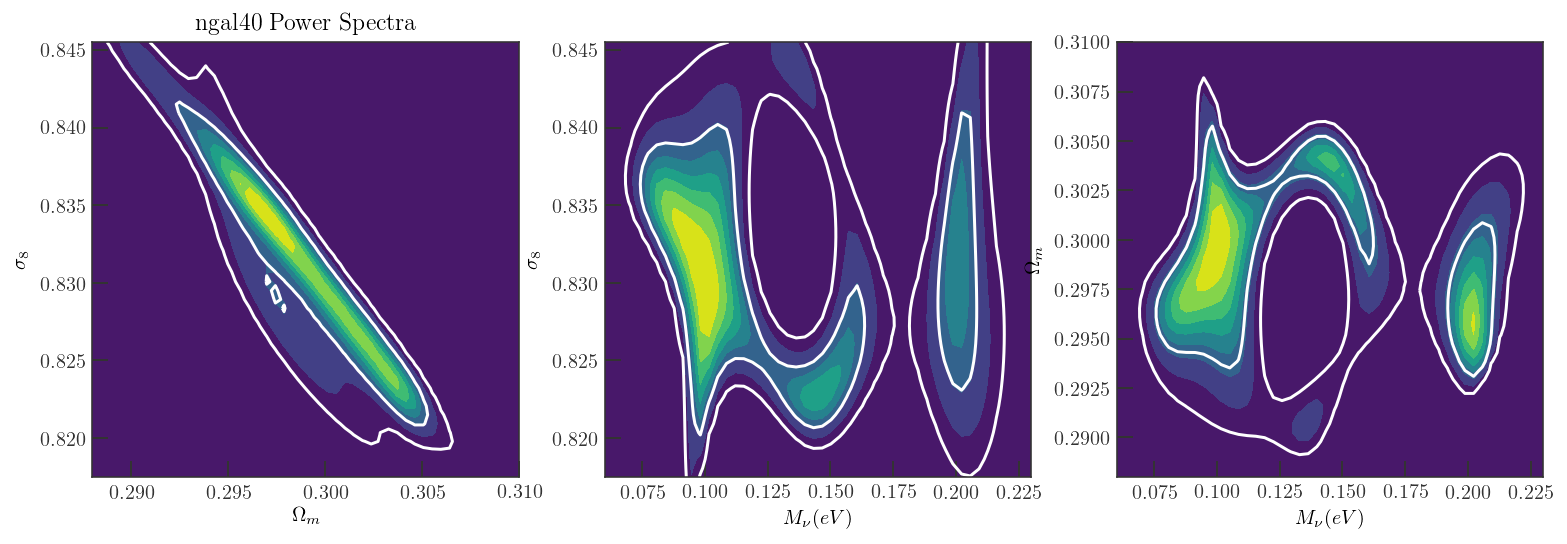

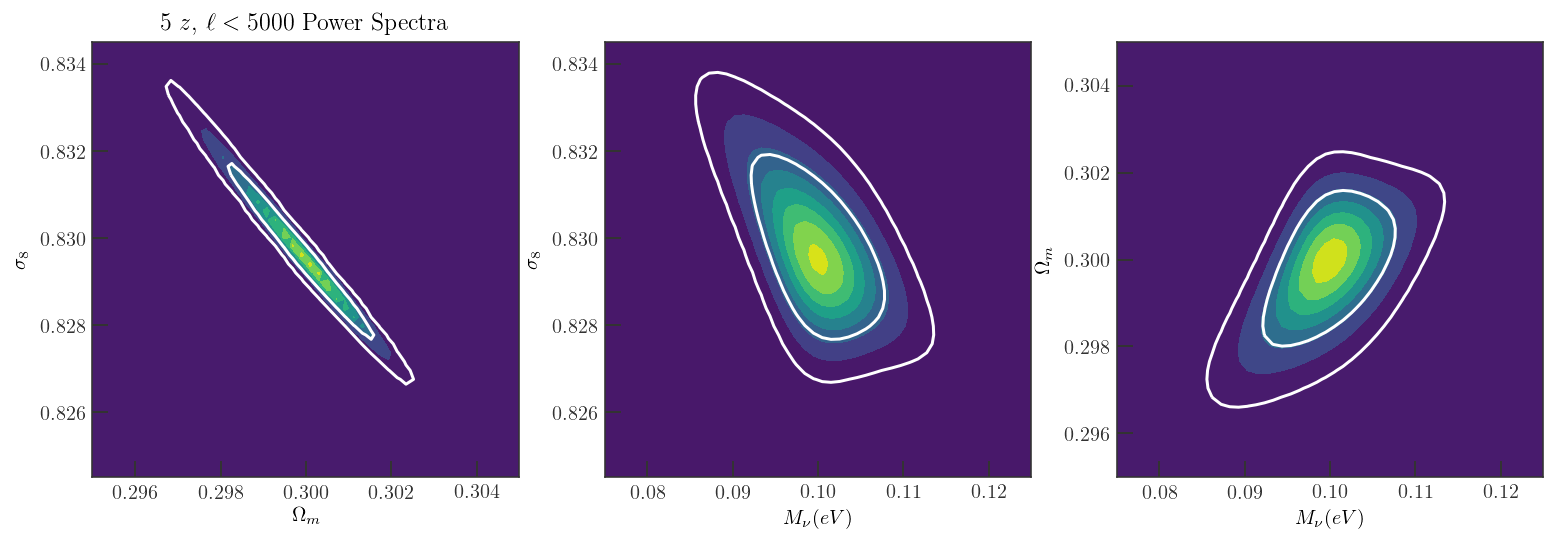

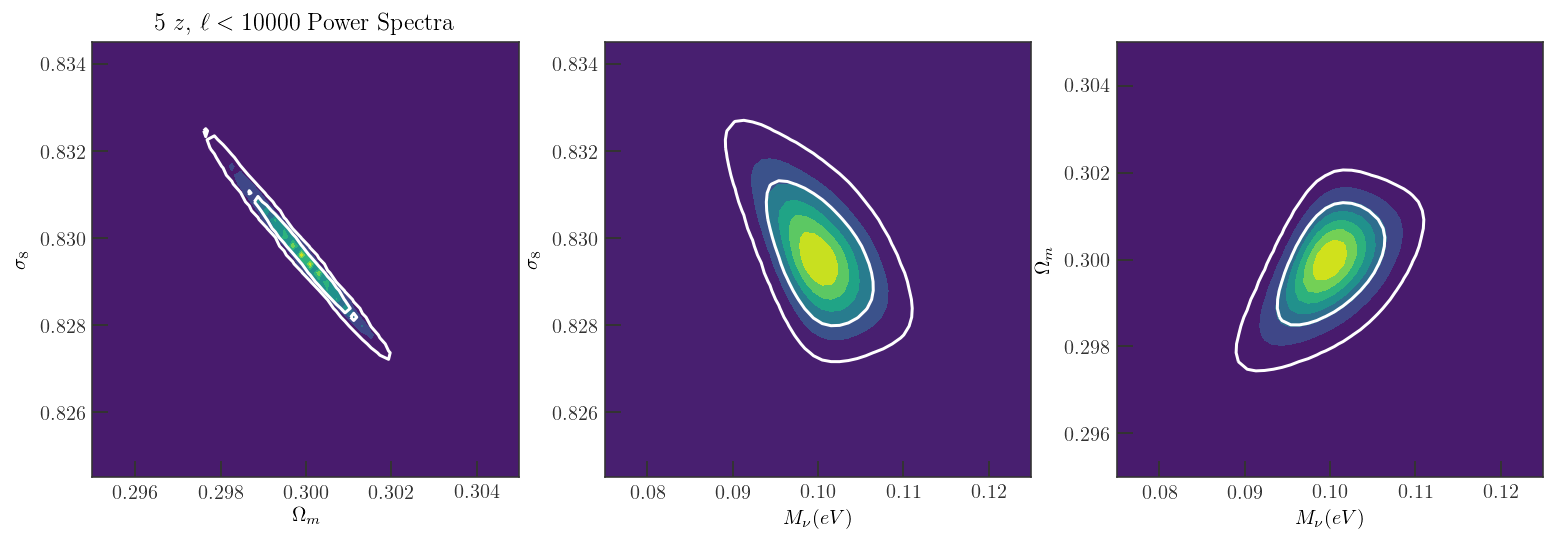

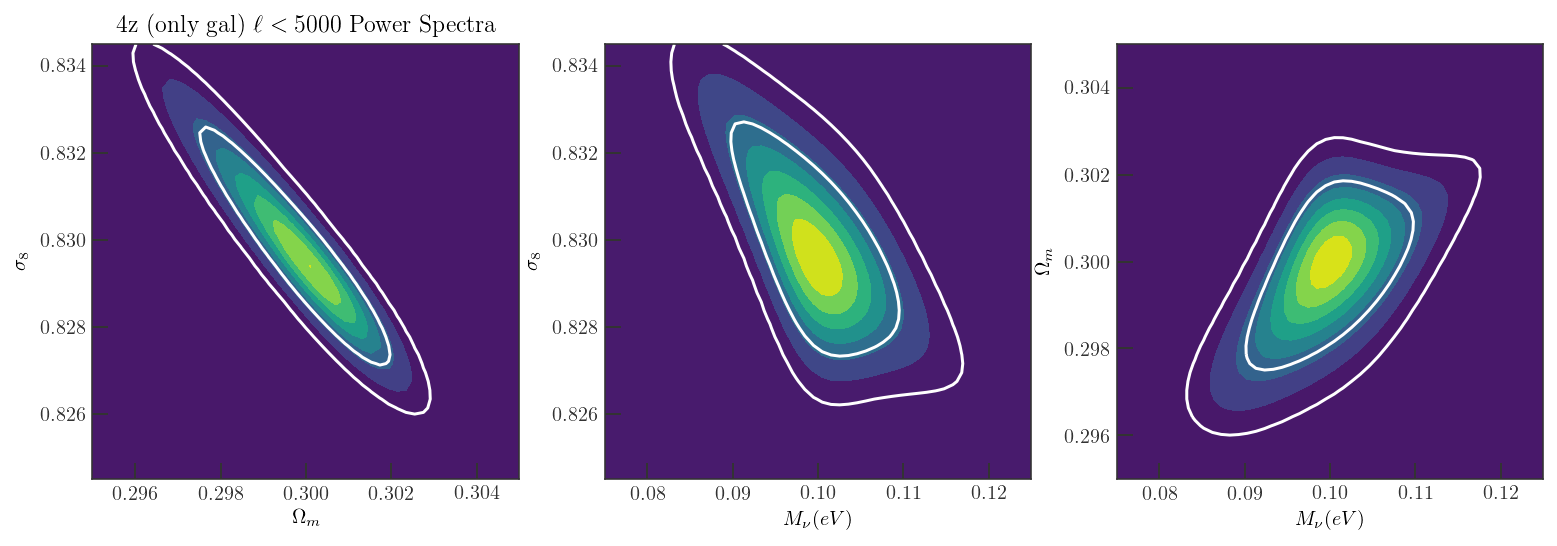

In [3]:
# c1
x,y,z = np.load( 'cubes/' + '1ngal40' + '_PS_xyz.npy' )
fig, ax = plot_cube(c1, [x,y,z],fill=True)
fig, ax = plot_cube(c1, [x,y,z], fig, ax, fill=False, colors='white')
ax[0].set_title('ngal40 Power Spectra')

# c2
x,y,z = np.load( 'cubes/' + '2all5redshifts' + '_PS_xyz.npy' )
fig, ax = plot_cube(c2, [x,y,z],fill=True)
fig, ax = plot_cube(c2, [x,y,z], fig, ax, fill=False, colors='white')
ax[0].set_title(r'5 $z$, $\ell < 5000$ Power Spectra')

# c3
x,y,z = np.load( 'cubes/' + '3all5redshifts-highl' + '_PS_xyz.npy' )
fig, ax = plot_cube(c3, [x,y,z],fill=True)
fig, ax = plot_cube(c3, [x,y,z], fig, ax, fill=False, colors='white')
ax[0].set_title(r'5 $z$, $\ell < 10000$ Power Spectra')


# only gal
x,y,z = np.load( 'cubes/' + 'onlygalaxies' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'onlygalaxies' + '_PS.npy' )
fig, ax = plot_cube(c, [x,y,z],fill=True)
fig, ax = plot_cube(c, [x,y,z], fig, ax, fill=False, colors='white')
ax[0].set_title(r' 4z (only gal) $\ell < 5000$ Power Spectra')


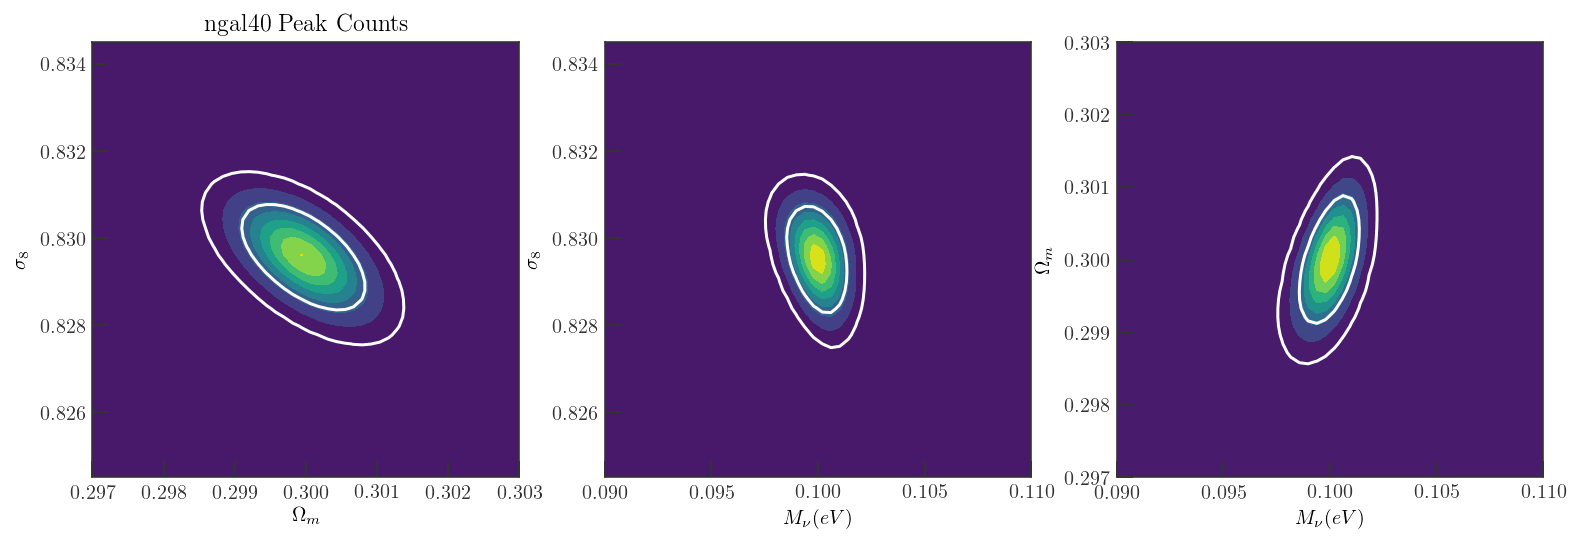

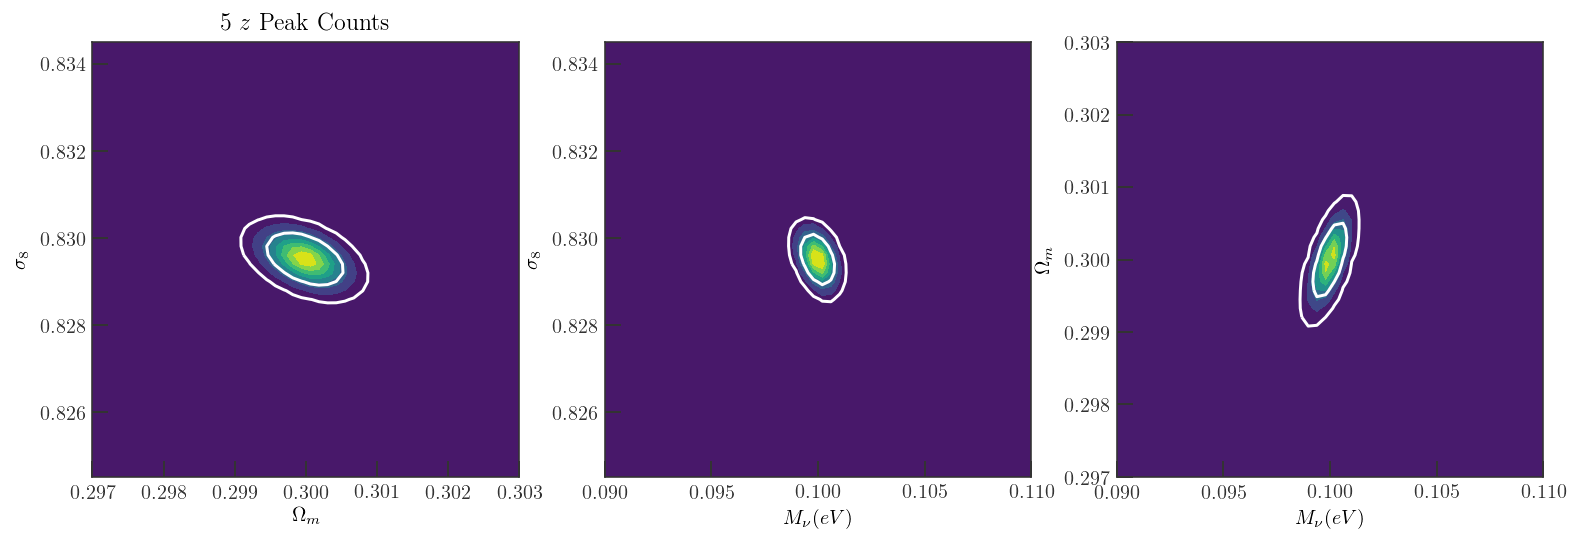

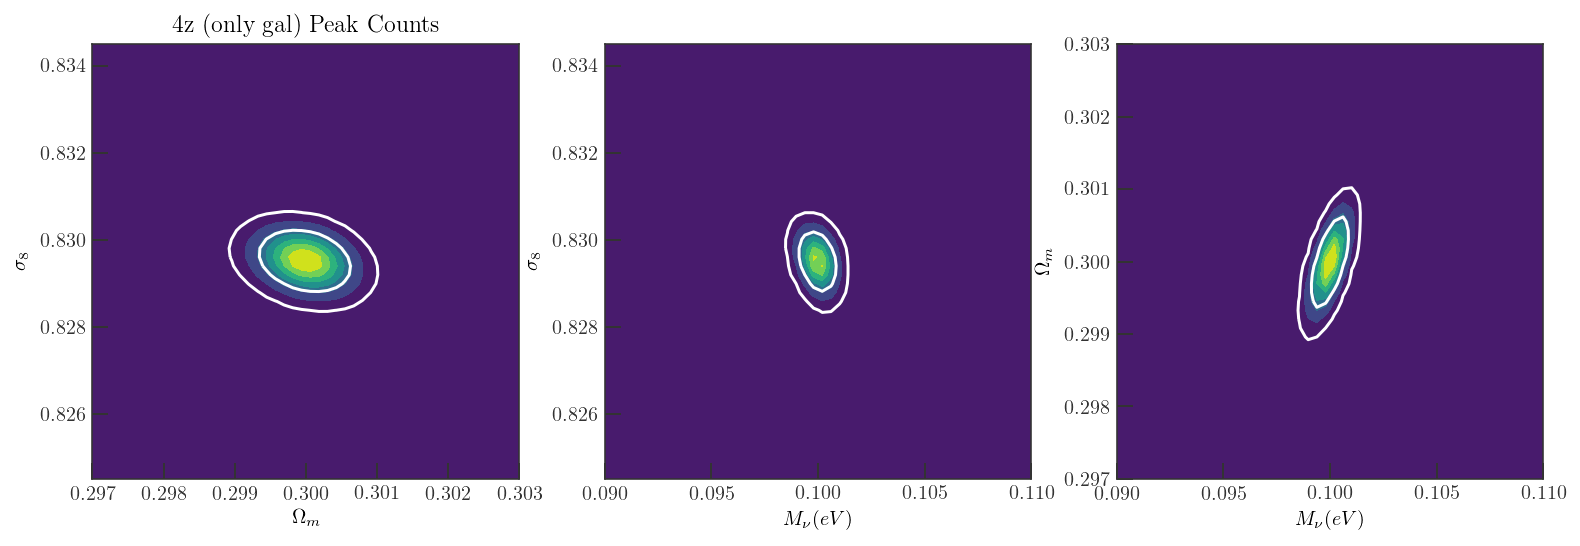

In [4]:
# c4
x,y,z = np.load( 'cubes/' + '1ngal40' + '_PC_xyz.npy' )
fig, ax = plot_cube(c4, [x,y,z],fill=True)
fig, ax = plot_cube(c4, [x,y,z], fig, ax, fill=False, colors='white')
ax[0].set_title('ngal40 Peak Counts')

# c5
x,y,z = np.load( 'cubes/' + '2all5redshifts' + '_PC_xyz.npy' )
fig, ax = plot_cube(c5, [x,y,z],fill=True)
fig, ax = plot_cube(c5, [x,y,z], fig, ax, fill=False, colors='white')
ax[0].set_title(r'5 $z$ Peak Counts')



# only galaxies

x,y,z = np.load( 'cubes/' + 'onlygalaxies' + '_PC_xyz.npy' )
c = np.load( 'cubes/' + 'onlygalaxies' + '_PC.npy' )
fig, ax = plot_cube(c, [x,y,z],fill=True)
fig, ax = plot_cube(c, [x,y,z], fig, ax, fill=False, colors='white')
ax[0].set_title(r' 4z (only gal) Peak Counts')


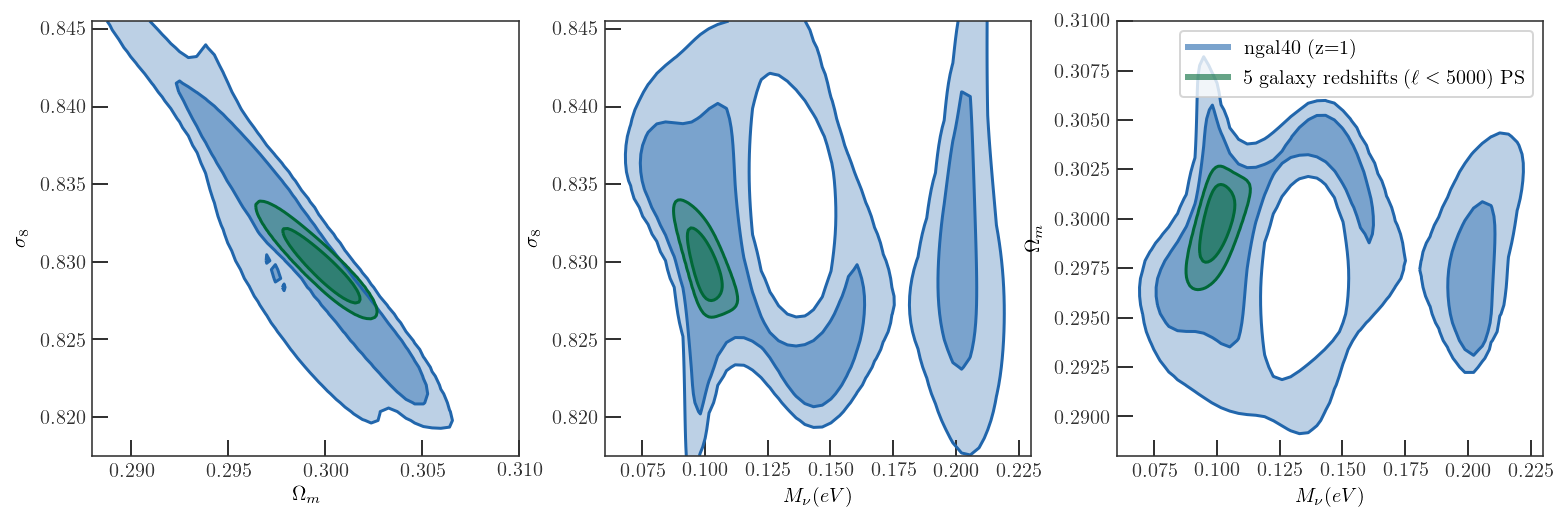

In [8]:
# redshift tomograph plot : PS

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']
    
# fig, ax = plt.subplots(3,1)

# 5 redshifts
x,y,z = np.load( 'cubes/' + '1ngal40' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '1ngal40' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='ngal40 (z=1)')


# 5 redshifts high ell
x,y,z = np.load( 'cubes/' + '5z' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '5z' + '_PS.npy' )
plot_cube_getdist_style(c, [x,y,z],fig,ax,fill=True, 
                        input_color=colorlist[2],
                       input_label='5 galaxy redshifts ($\ell < 5000$) PS')


ax[-1].legend()

fig.savefig('figures/fig_ngal40_vs_5z.pdf')

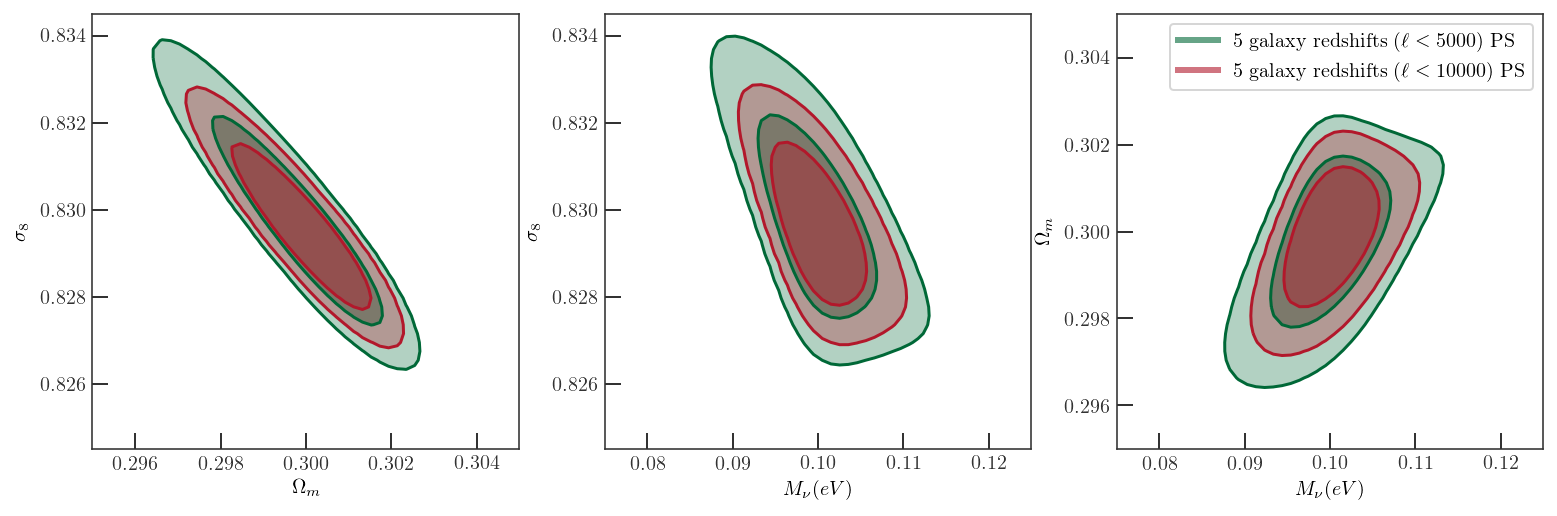

In [9]:
# high ell plot

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']
    

# 5 redshifts high ell
x,y,z = np.load( 'cubes/' + '5z' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '5z' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[2],
                       input_label='5 galaxy redshifts  ($\ell < 5000$)  PS')

# 5 redshifts
x,y,z = np.load( 'cubes/' + '5z-highl' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '5z-highl' + '_PS.npy' )
plot_cube_getdist_style(c, [x,y,z],fig,ax,fill=True, 
                        input_color=colorlist[3],
                       input_label='5 galaxy redshifts ($\ell < 10000$) PS')

ax[-1].legend()

fig.savefig('figures/fig_5z_ell_comparison.pdf')

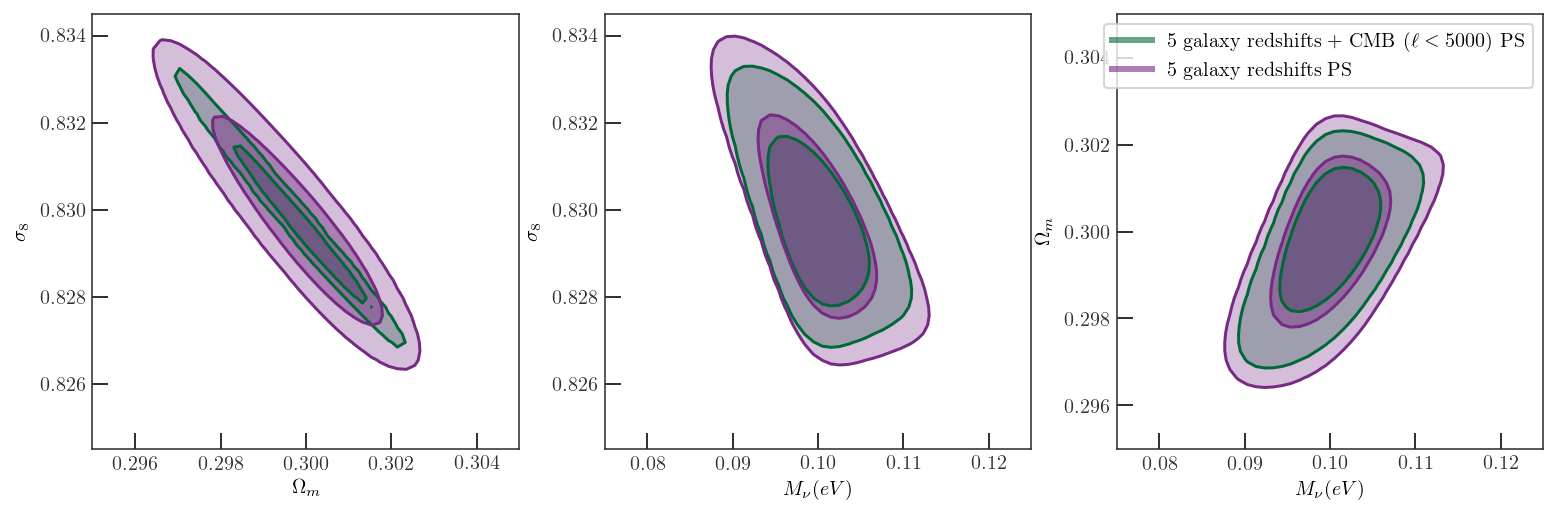

In [10]:
# effect of CMB

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']
    


# 4 redshifts
x,y,z = np.load( 'cubes/' + '5zCMB' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '5zCMB' + '_PS.npy' )
fig,ax = plot_cube_getdist_style(c, [x,y,z], fill=True, 
                        input_color=colorlist[2],
                       input_label='5 galaxy redshifts + CMB ($\ell < 5000$) PS')


# 5 redshifts
x,y,z = np.load( 'cubes/' + '5z' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '5z' + '_PS.npy' )
fig,ax = plot_cube_getdist_style(c, [x,y,z],fig, ax,fill=True, 
                        input_color=colorlist[4],
                       input_label='5 galaxy redshifts PS')

ax[-1].legend()


fig.savefig('figures/fig_5z_PS_CMB_compare.pdf')

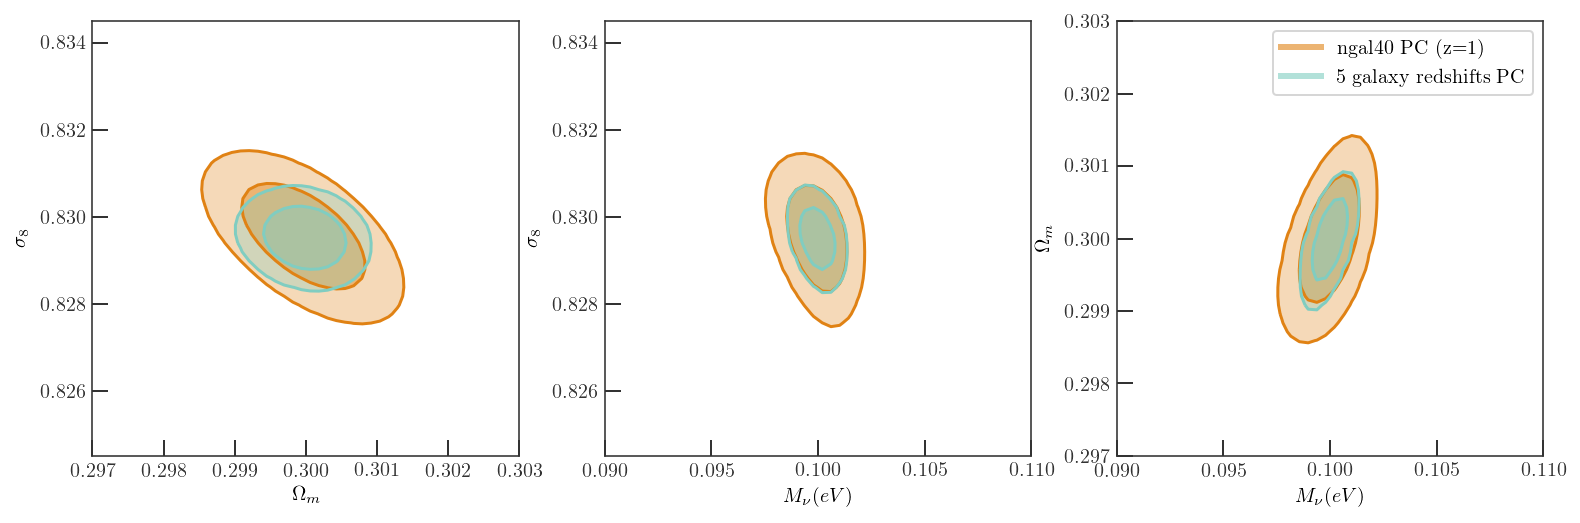

In [11]:
# redshift tomograph plot : PC

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']
    

# 5 redshifts
x,y,z = np.load( 'cubes/' + '1ngal40' + '_PC_xyz.npy' )
c = np.load( 'cubes/' + '1ngal40' + '_PC.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[5],
                       input_label='ngal40 PC (z=1)')


x,y,z = np.load( 'cubes/' + '5z' + '_PC_xyz.npy' )
c = np.load( 'cubes/' + '5z' + '_PC.npy' )
plot_cube_getdist_style(c, [x,y,z],fig,ax,fill=True, 
                        input_color=colorlist[6],
                       input_label='5 galaxy redshifts PC')


ax[-1].legend()

fig.savefig('figures/fig_PC_ngal40_5z.pdf')

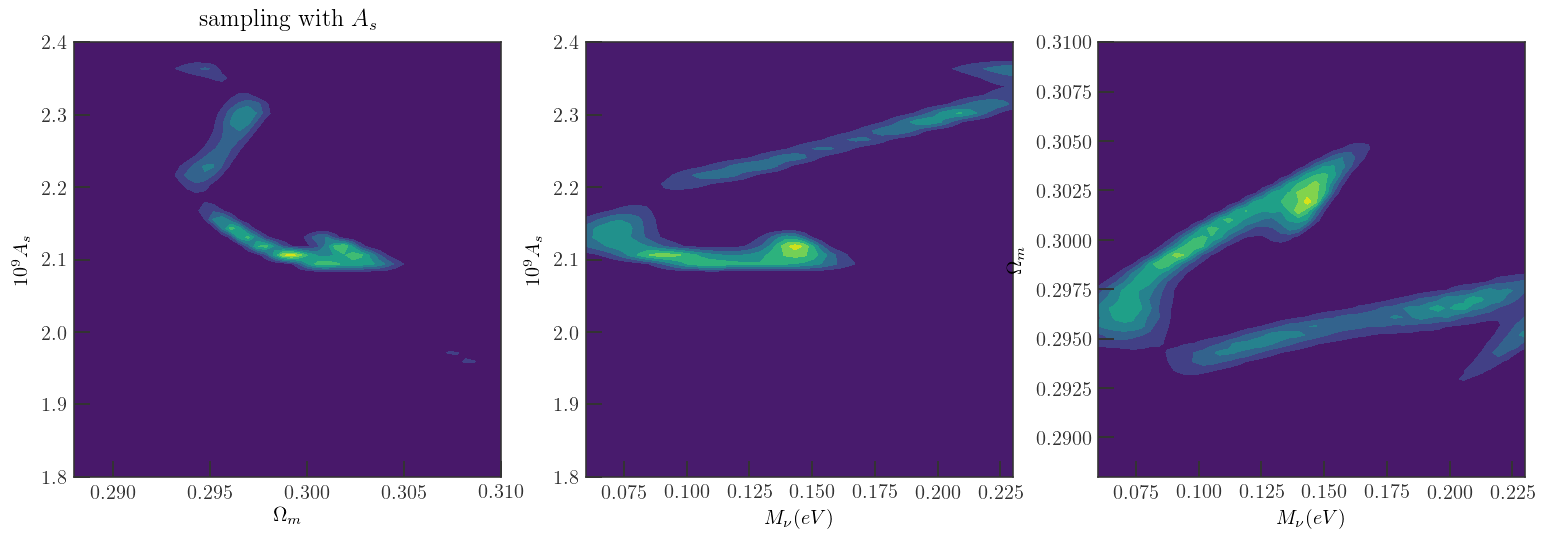

In [102]:
# ngal40 A_s

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']
    

# 5 redshifts
x,y,z = np.load( 'cubes/' + '1ngal40_A_s' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '1ngal40_A_s' + '_PS.npy' )
fig, ax = plot_cube(c, [x,y,z],fill=True, label_list=[r'$M_{\nu}(eV)$', r'$\Omega_m$', r'$10^9 A_s$']
                        )
ax[0].set_title(r'sampling with $A_s$')
# ax[-1].legend()

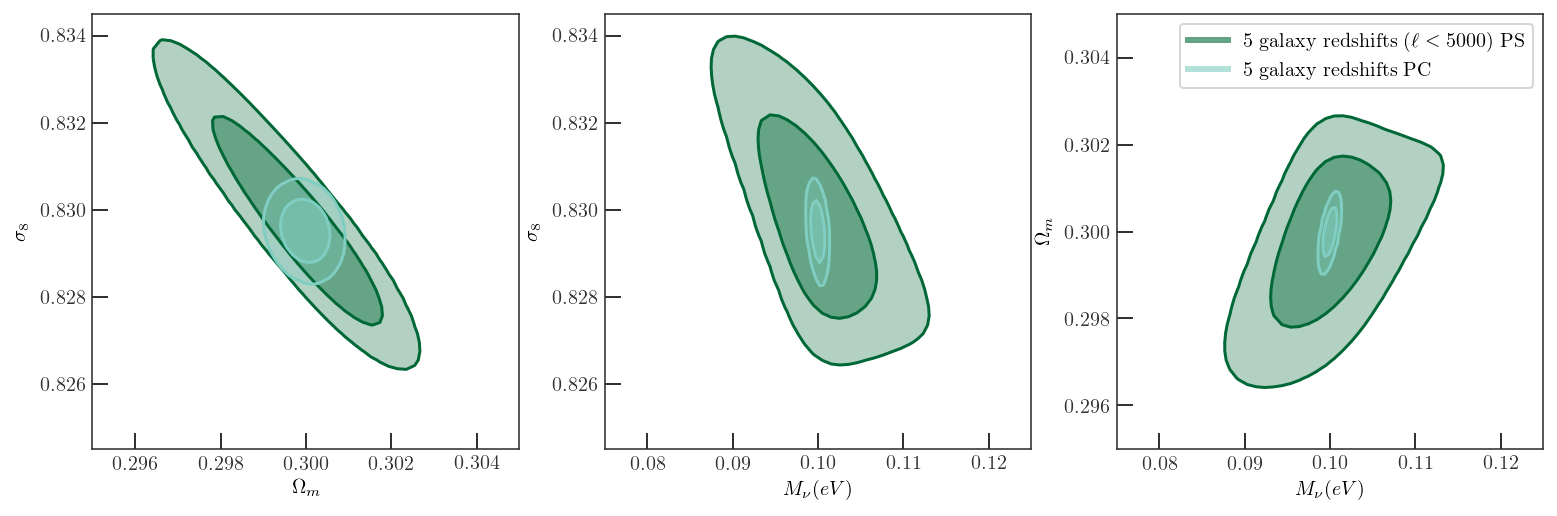

In [12]:
# redshift tomograph plot : PC

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']
    

# 5 redshifts

# 4 redshifts
x,y,z = np.load( 'cubes/' + '5z' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '5z' + '_PS.npy' )
fig,ax = plot_cube_getdist_style(c, [x,y,z], fill=True, 
                        input_color=colorlist[2],
                       input_label='5 galaxy redshifts ($\ell < 5000$) PS')

x,y,z = np.load( 'cubes/' + '5z' + '_PC_xyz.npy' )
c = np.load( 'cubes/' + '5z' + '_PC.npy' )
plot_cube_getdist_style(c, [x,y,z],fig,ax,fill=True, 
                        input_color=colorlist[6],
                       input_label='5 galaxy redshifts PC')


ax[-1].legend()

fig.savefig('figures/fig_compare_PS_PC.pdf')

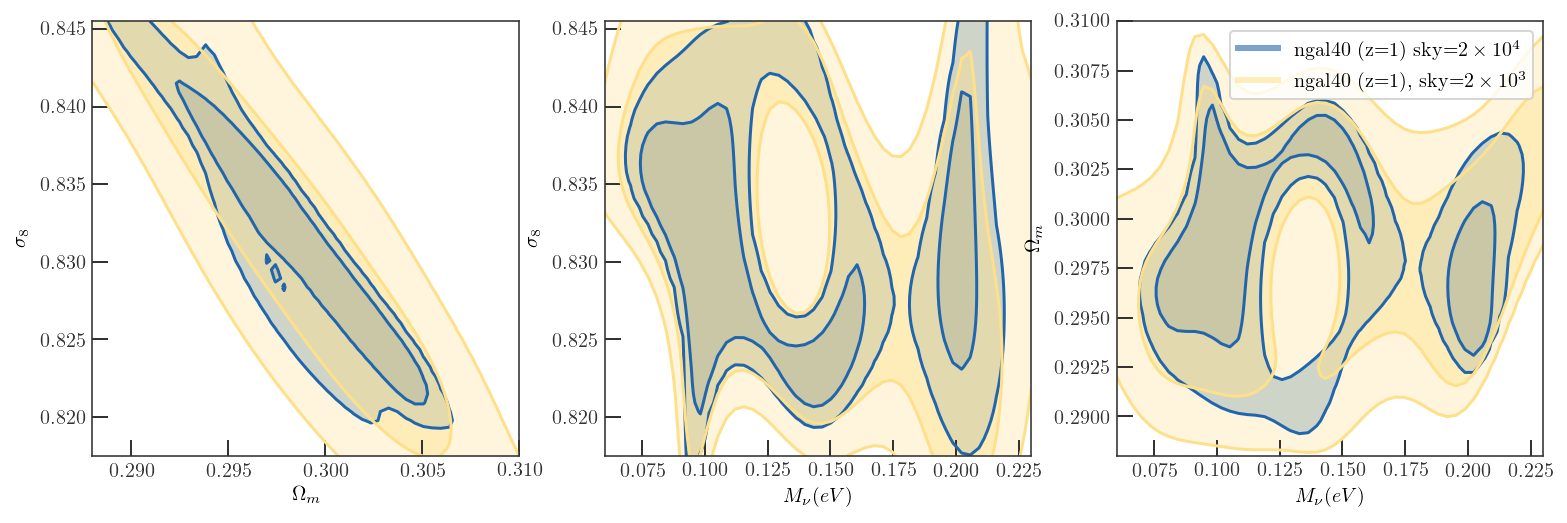

In [13]:
# ngal40 debugging plot

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']
    

# ngal40
x,y,z = np.load( 'cubes/' + '1ngal40' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '1ngal40' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label=r'ngal40 (z=1) sky=$2 \times 10^4$')


# ngal40
x,y,z = np.load( 'cubes/' + '1ngal40_sky2e3' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + '1ngal40_sky2e3' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fig, ax,fill=True, 
                        input_color=colorlist[8],
                       input_label=r'ngal40 (z=1), sky=$2 \times 10^3$')


ax[-1].legend()


fig.savefig('figures/fig_sky_fraction.pdf')

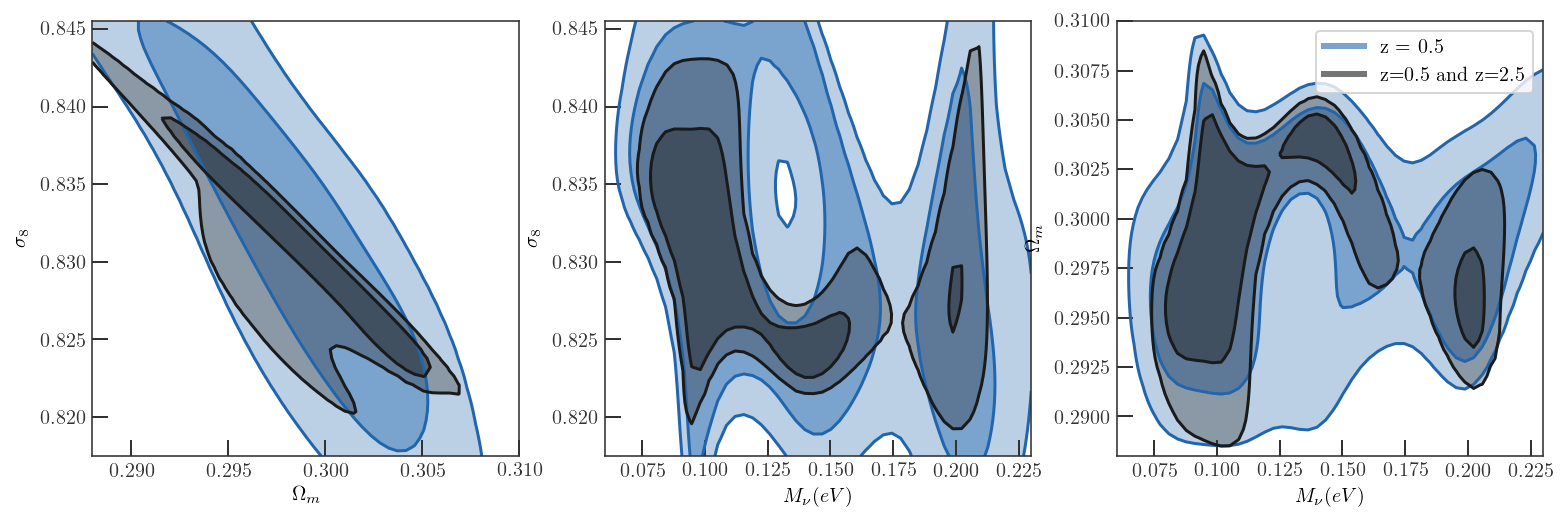

In [11]:
# ngal40 debugging plot

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']
    

# ngal40
x,y,z = np.load( 'cubes/' + 'justz05' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'justz05' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label=r'z = 0.5')


# ngal40
x,y,z = np.load( 'cubes/' + 'lever1' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'lever1' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fig, ax,fill=True, 
                        input_color=colorlist[0],
                       input_label=r'z=0.5 and z=2.5')


ax[-1].legend()

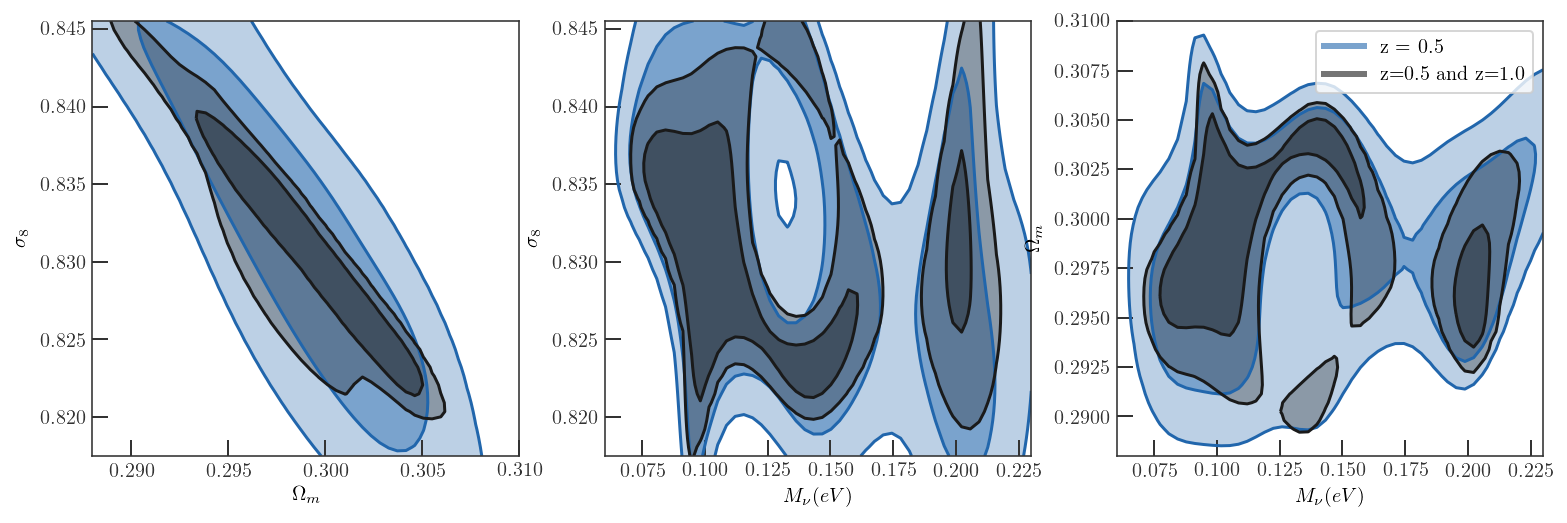

In [13]:
# ngal40 debugging plot

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']
    

# ngal40
x,y,z = np.load( 'cubes/' + 'justz05' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'justz05' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label=r'z = 0.5')


# ngal40
x,y,z = np.load( 'cubes/' + 'lever2' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'lever2' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fig, ax,fill=True, 
                        input_color=colorlist[0],
                       input_label=r'z=0.5 and z=1.0')


ax[-1].legend()

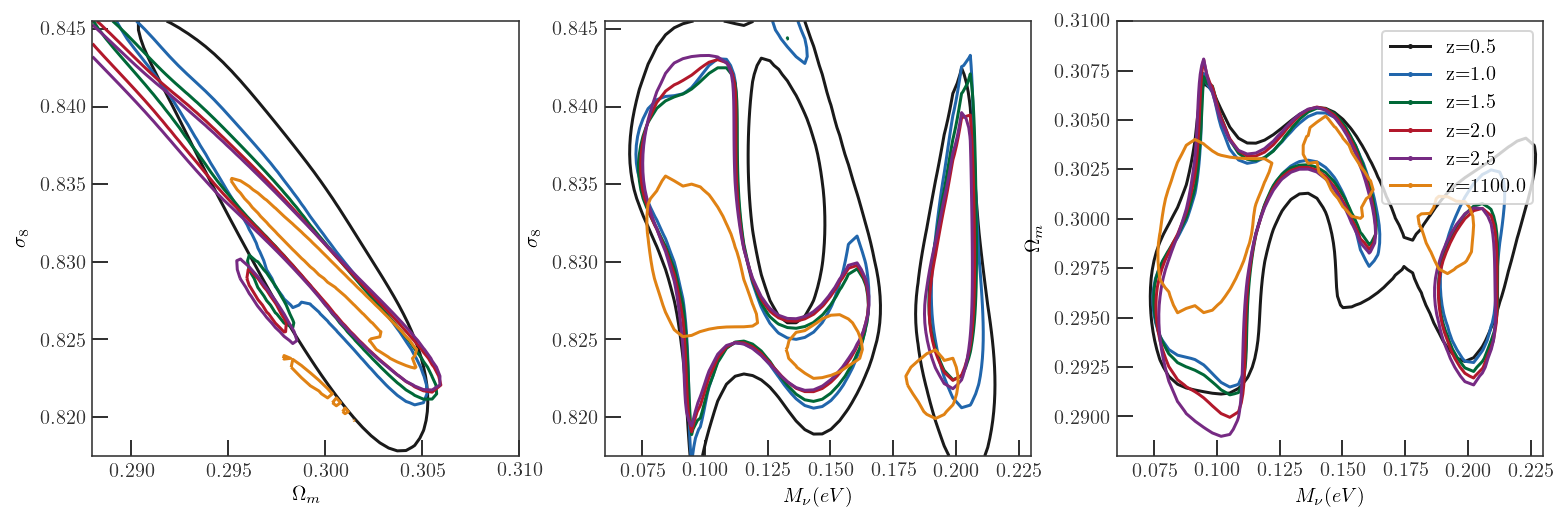

In [29]:
# redshift tomograph plot : PS

from forecast import plot_cube_getdist_style

colorlist = ['#1A1A1A', '#2166AC', '#006837', '#B2182B', '#762A83', '#E08214', '#80CDC1', '#C51B7D', '#FEE08B']

ctot = np.zeros( (50,50,50) )
fig, ax = plt.subplots(1,3,figsize=(13,4))
for ind, rr in enumerate(['05', '10', '15', '20', '25', '11000']):

    # ngal40
    x,y,z = np.load( 'cubes/' + 'justz' + rr + '_PS_xyz.npy' )
    c = np.load( 'cubes/' + 'justz' + rr + '_PS.npy' )
    fig, ax = plot_cube(c, [x,y,z],fig,ax,fill=False, 
                            colors=(colorlist[ind],),
                           label='z=' + rr[0] + '.' + rr[1], just_1sig=True)
    plt.plot([], [], label='z=' + rr[:-1] + '.' + rr[-1])
    ctot += c
ax[-1].legend()


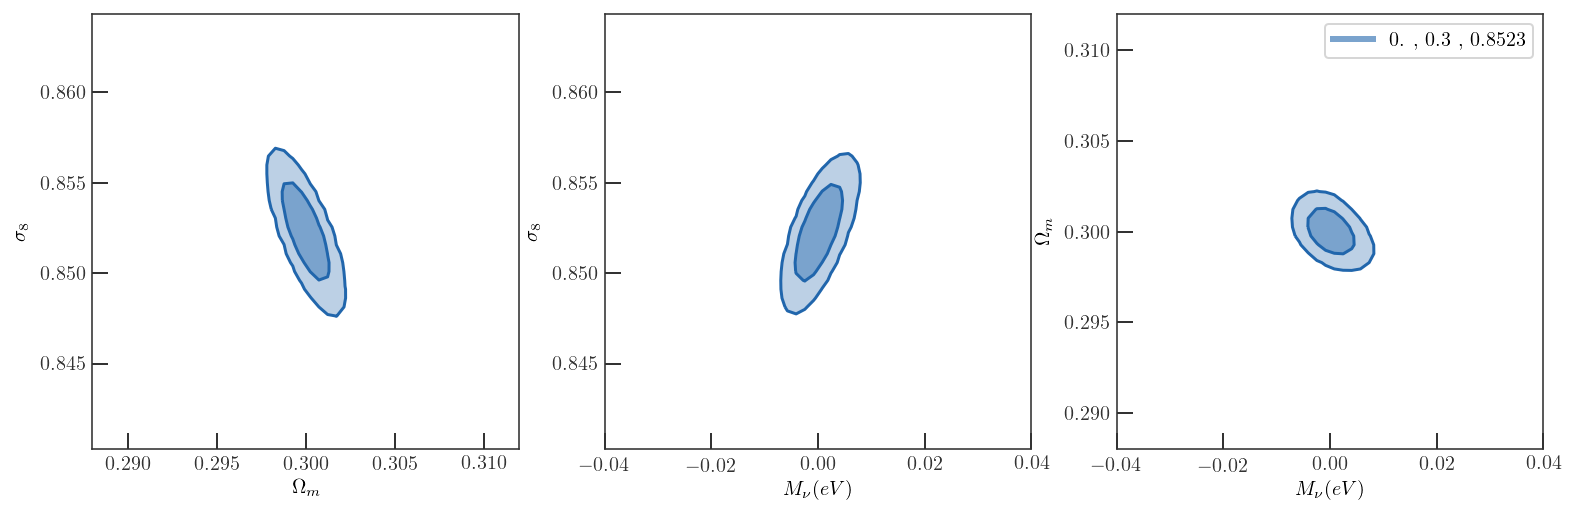

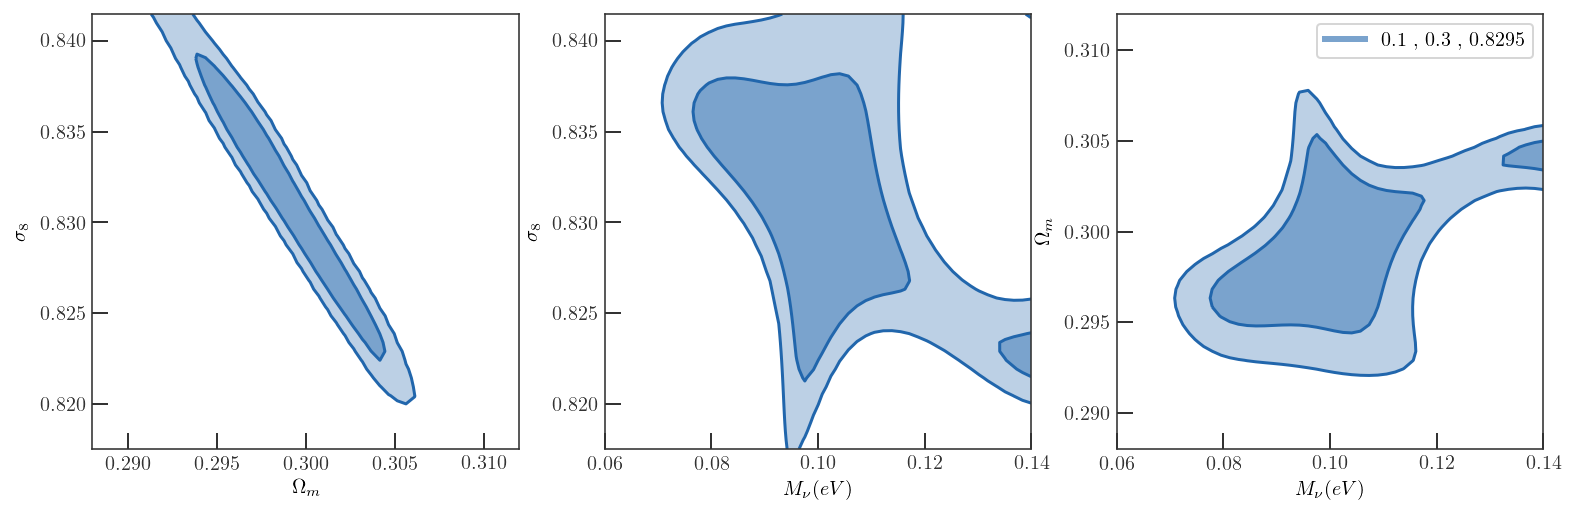

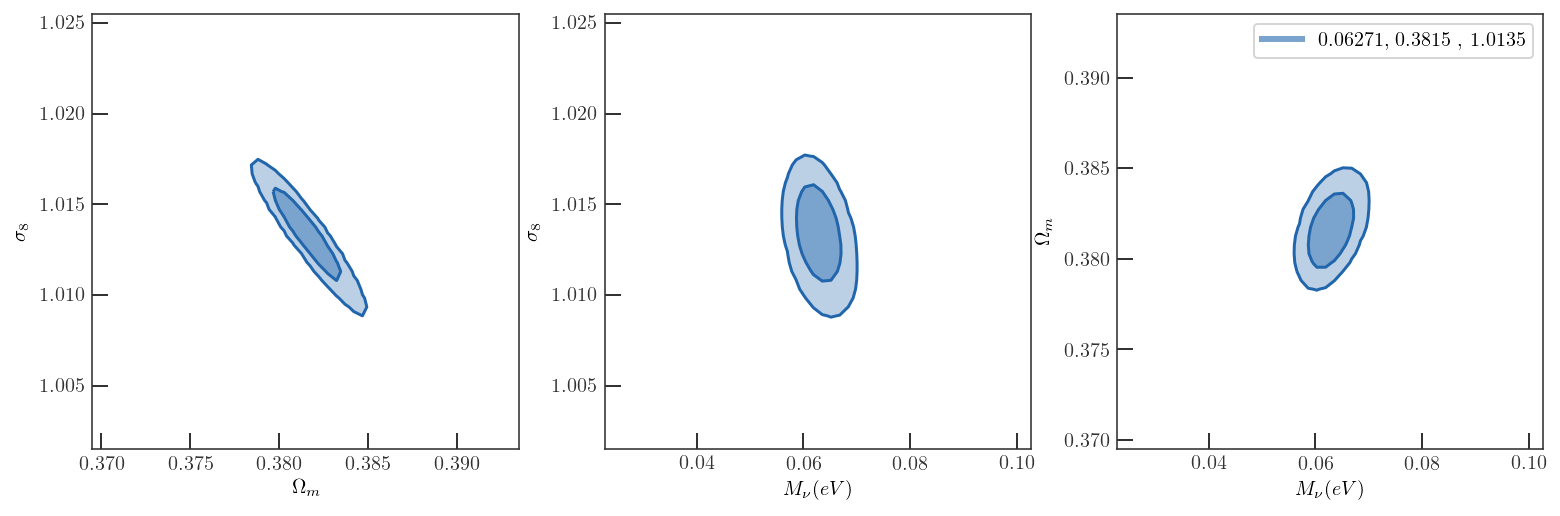

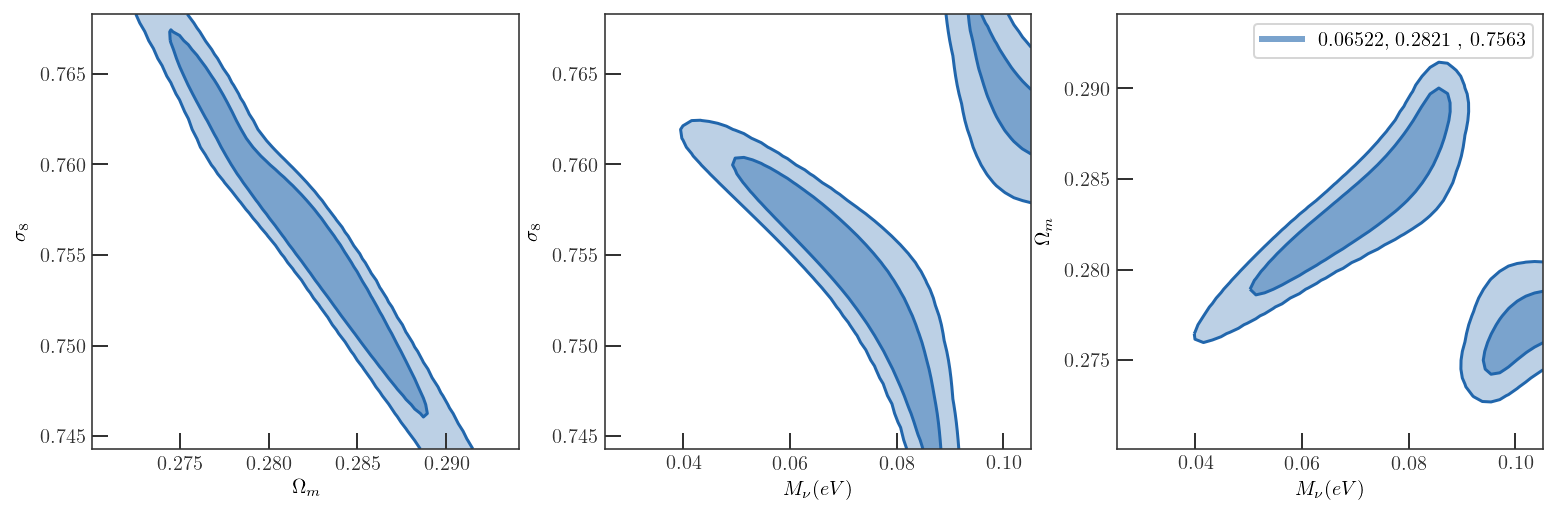

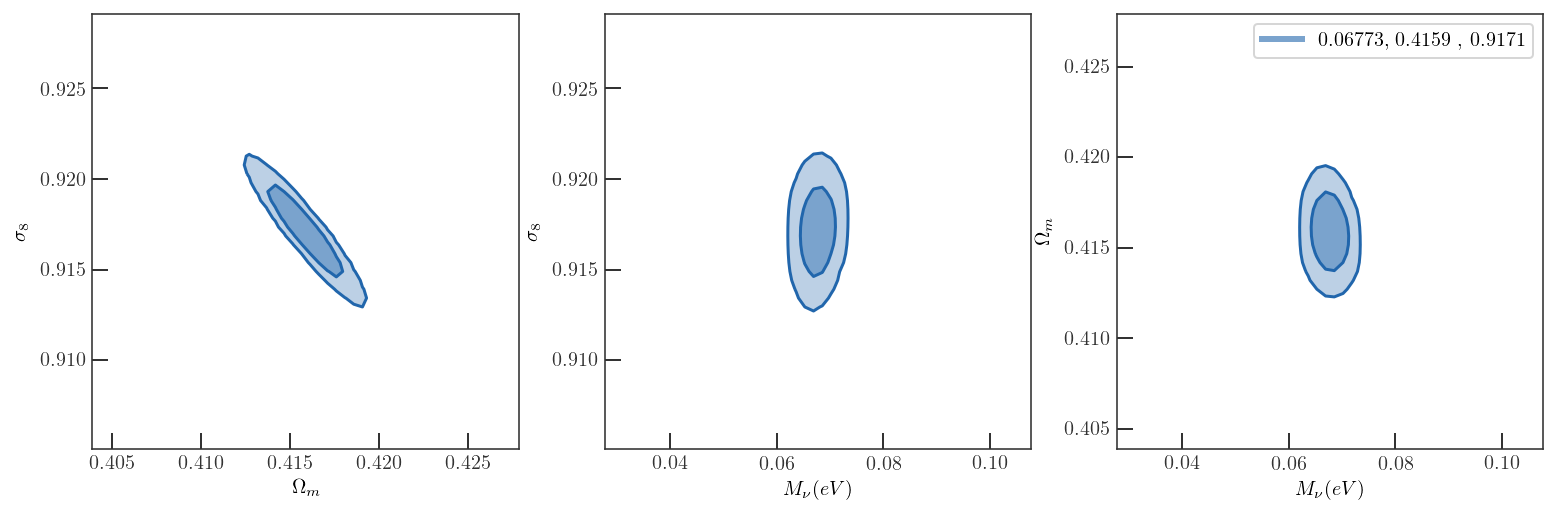

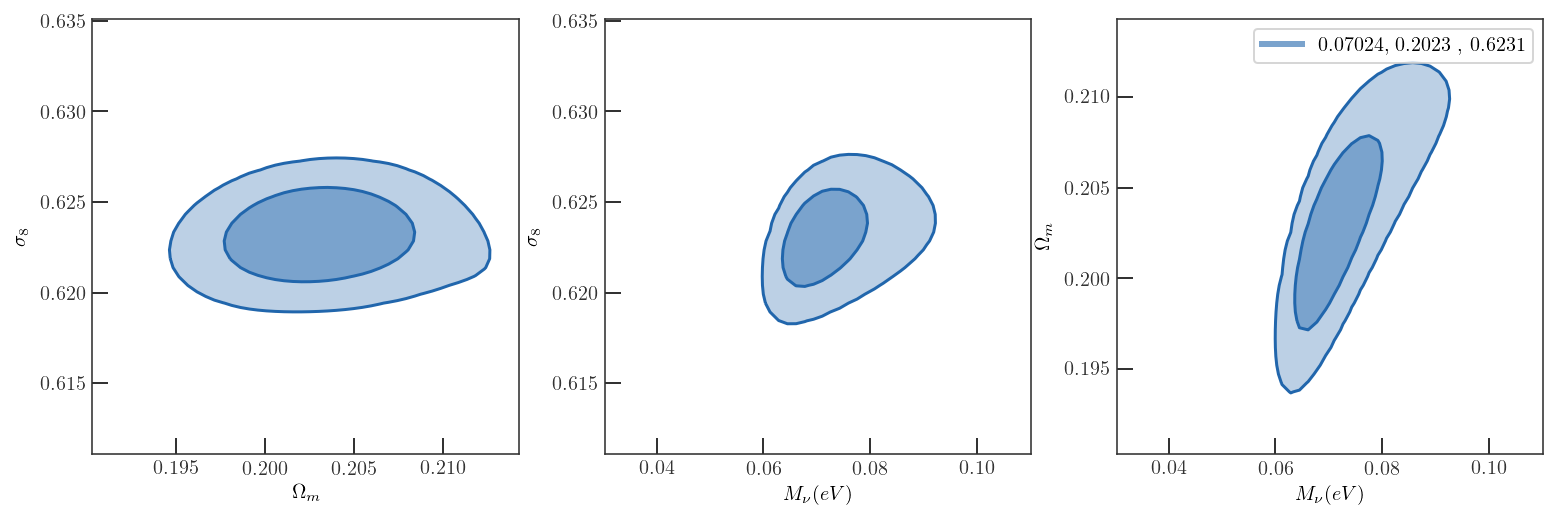

In [20]:
# 5 redshifts
x,y,z = np.load( 'cubes/' + 'fid0' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'fid0' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='0.    ,  0.3   ,  0.8523')
ax[-1].legend()

# 5 redshifts
x,y,z = np.load( 'cubes/' + 'fid1' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'fid1' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='0.1   ,  0.3   ,  0.8295')
ax[-1].legend()

# 5 redshifts
x,y,z = np.load( 'cubes/' + 'fid2' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'fid2' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='0.06271,  0.3815 ,  1.0135')

ax[-1].legend()
# 5 redshifts
x,y,z = np.load( 'cubes/' + 'fid3' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'fid3' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='0.06522,  0.2821 ,  0.7563')

ax[-1].legend()
# 5 redshifts
x,y,z = np.load( 'cubes/' + 'fid4' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'fid4' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='0.06773,  0.4159 ,  0.9171')

ax[-1].legend()
# 5 redshifts
x,y,z = np.load( 'cubes/' + 'fid5' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'fid5' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='0.07024,  0.2023 ,  0.6231')
ax[-1].legend()

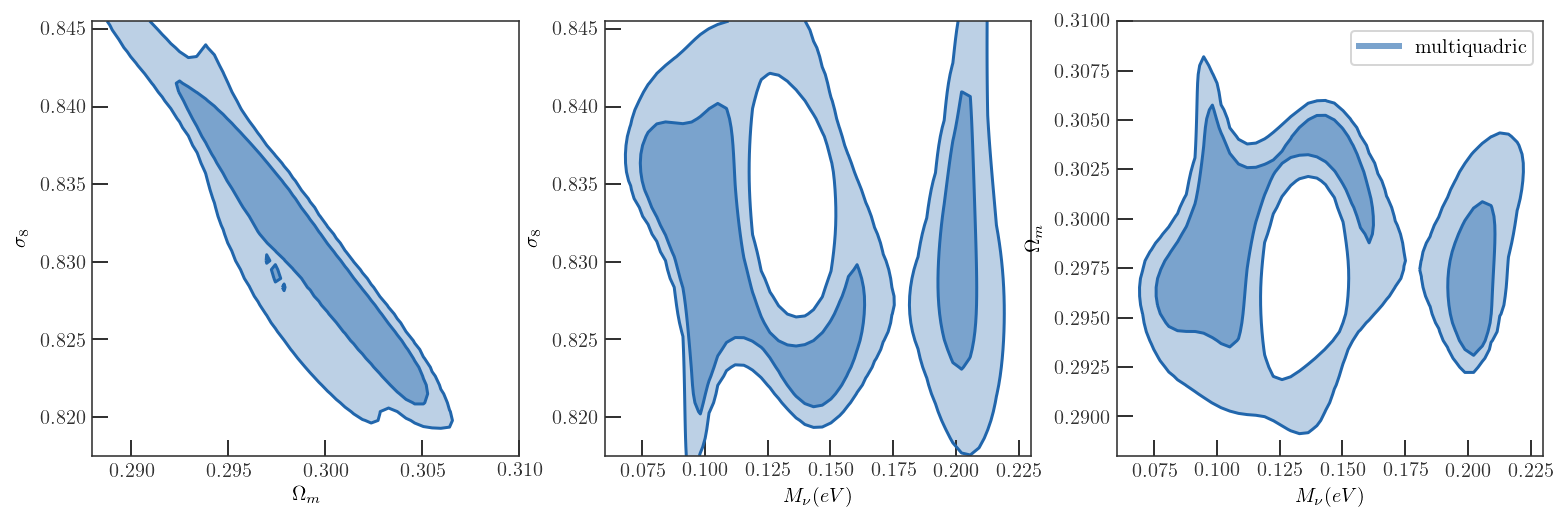

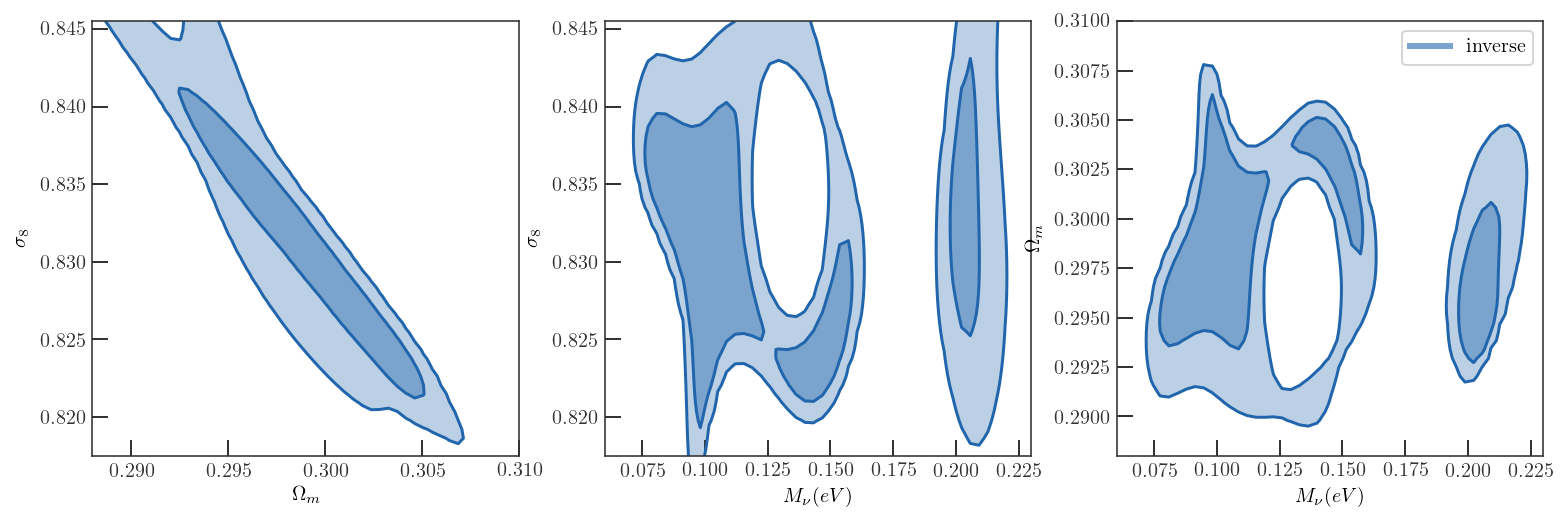

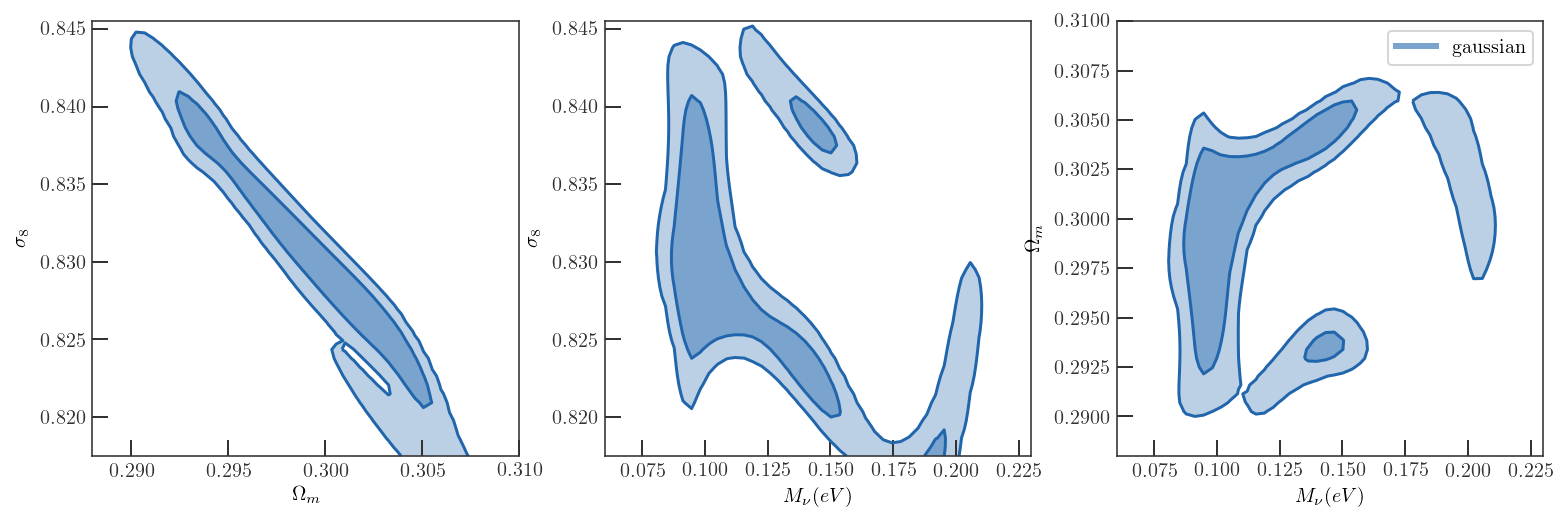

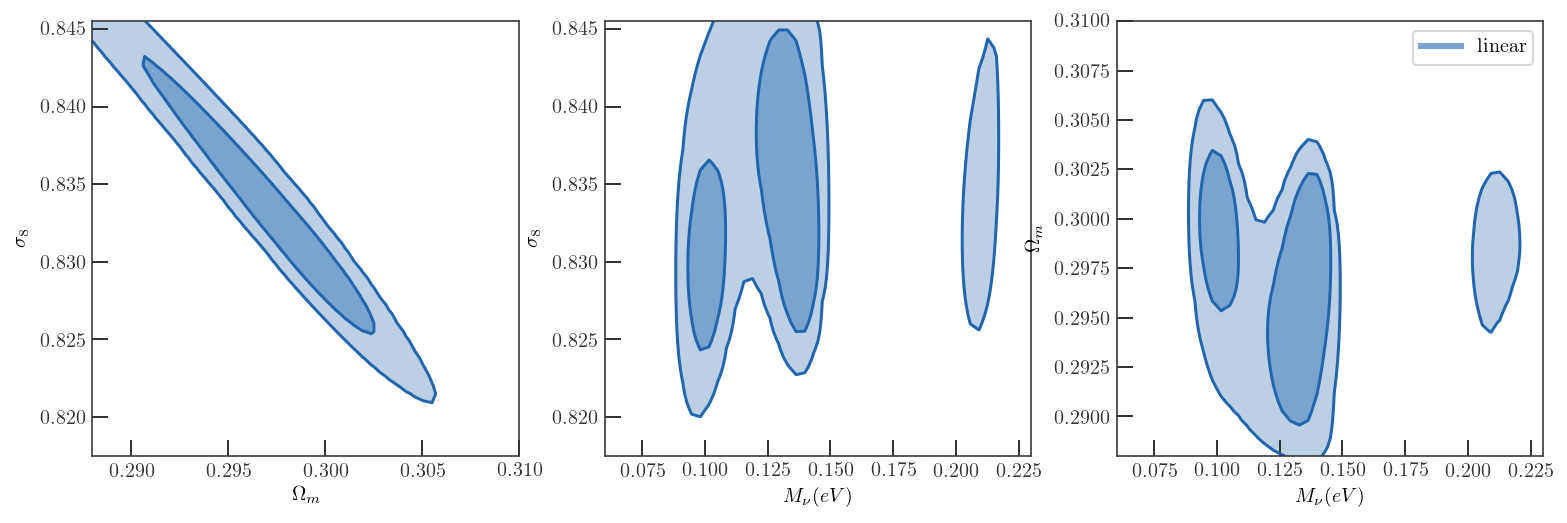

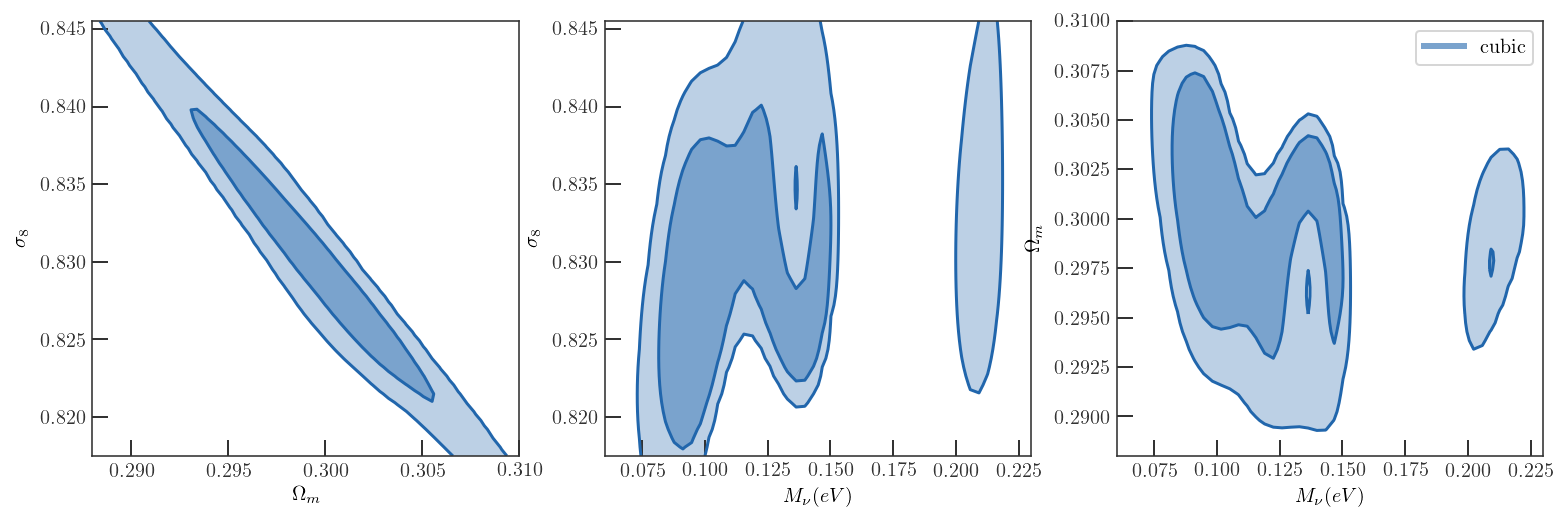

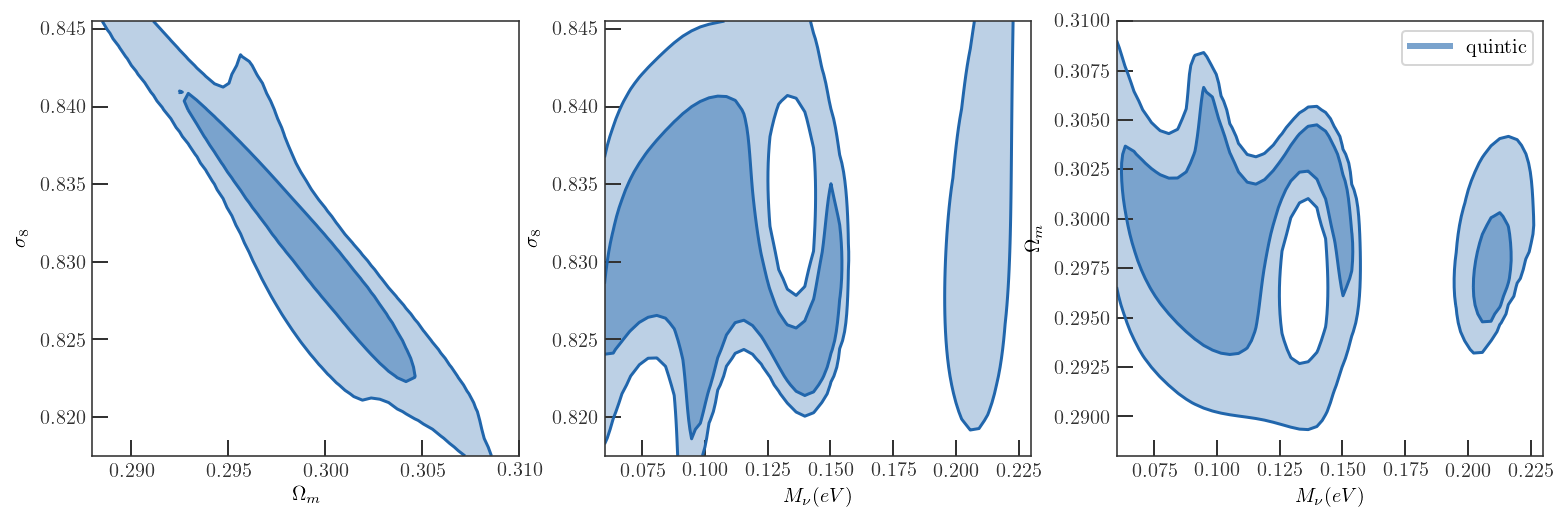

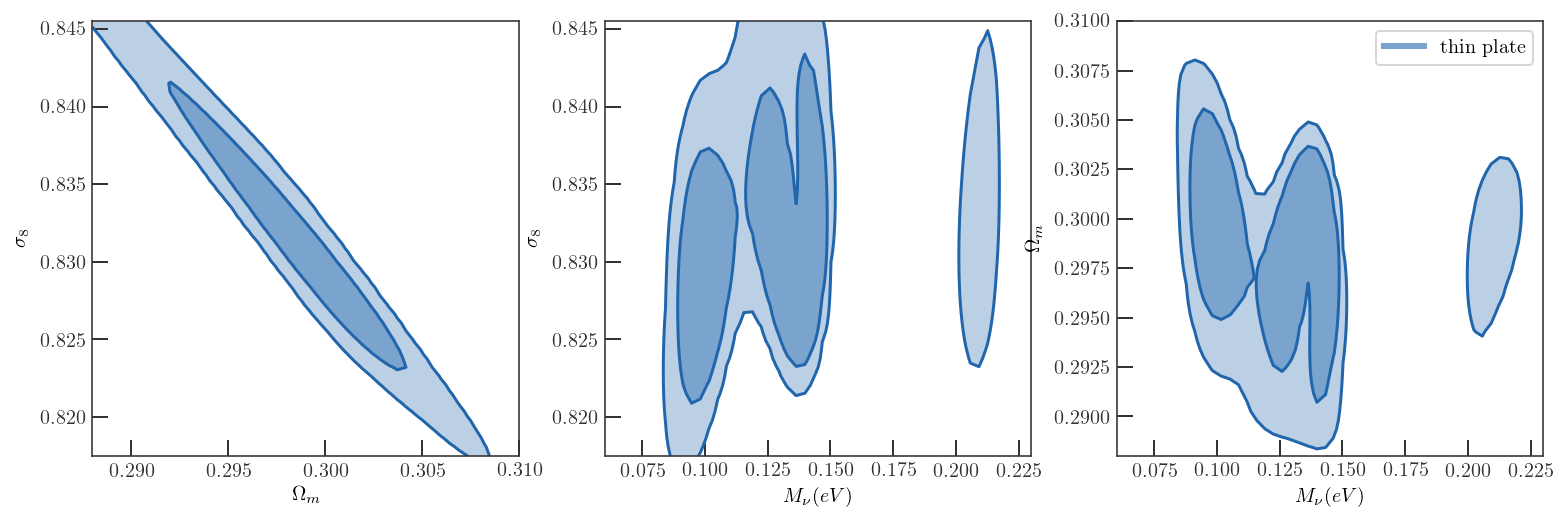

In [22]:
interp_list = ['multiquadric','inverse','gaussian','linear','cubic','quintic','thin_plate']

for interp_name in interp_list:

    x,y,z = np.load( 'cubes/' + interp_name + '_PS_xyz.npy' )
    c = np.load( 'cubes/' + interp_name + '_PS.npy' )
    fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                            input_color=colorlist[1],
                           input_label=interp_name.replace('_', ' '))
    ax[-1].legend()

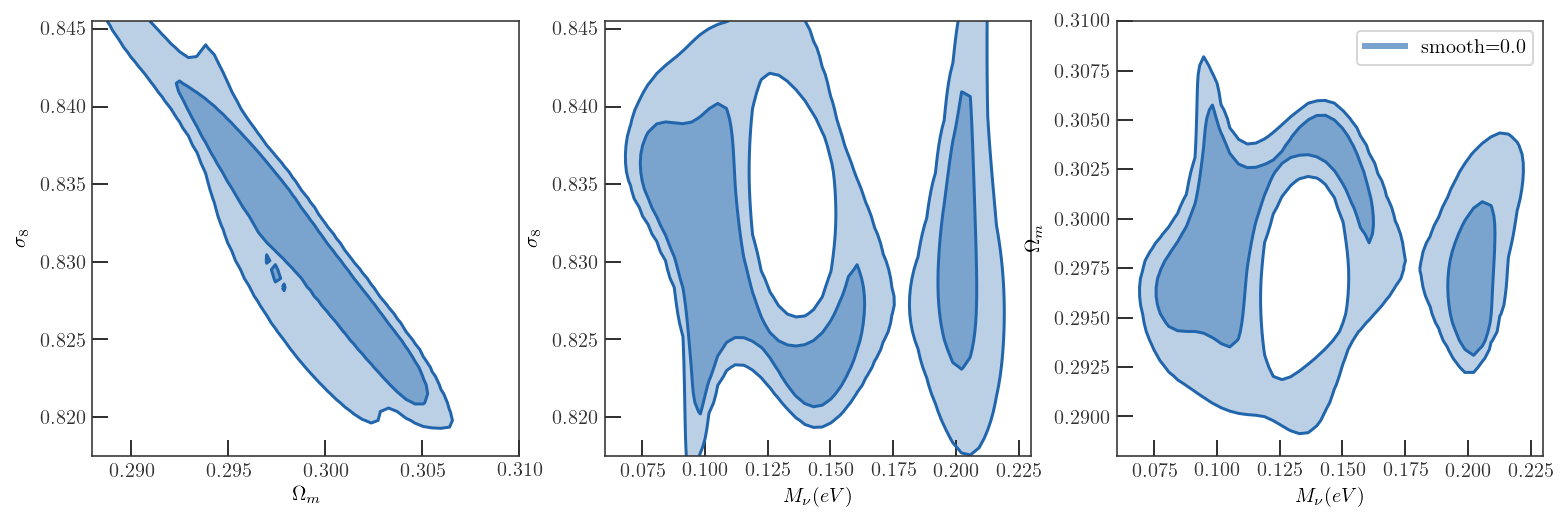

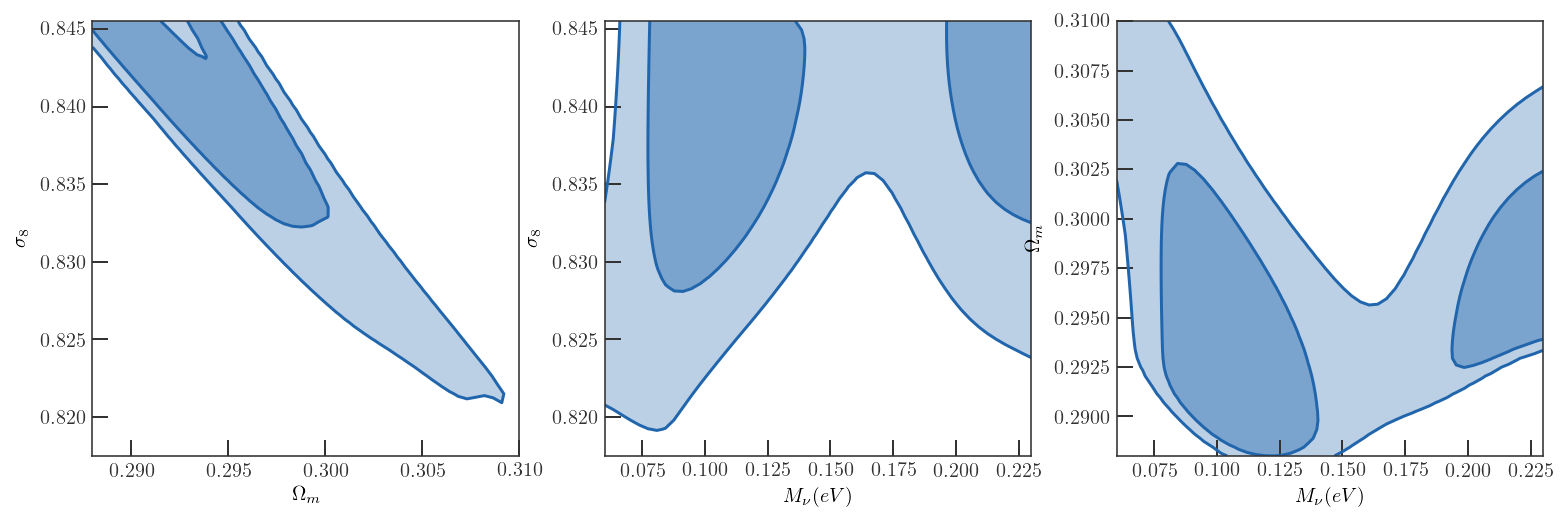

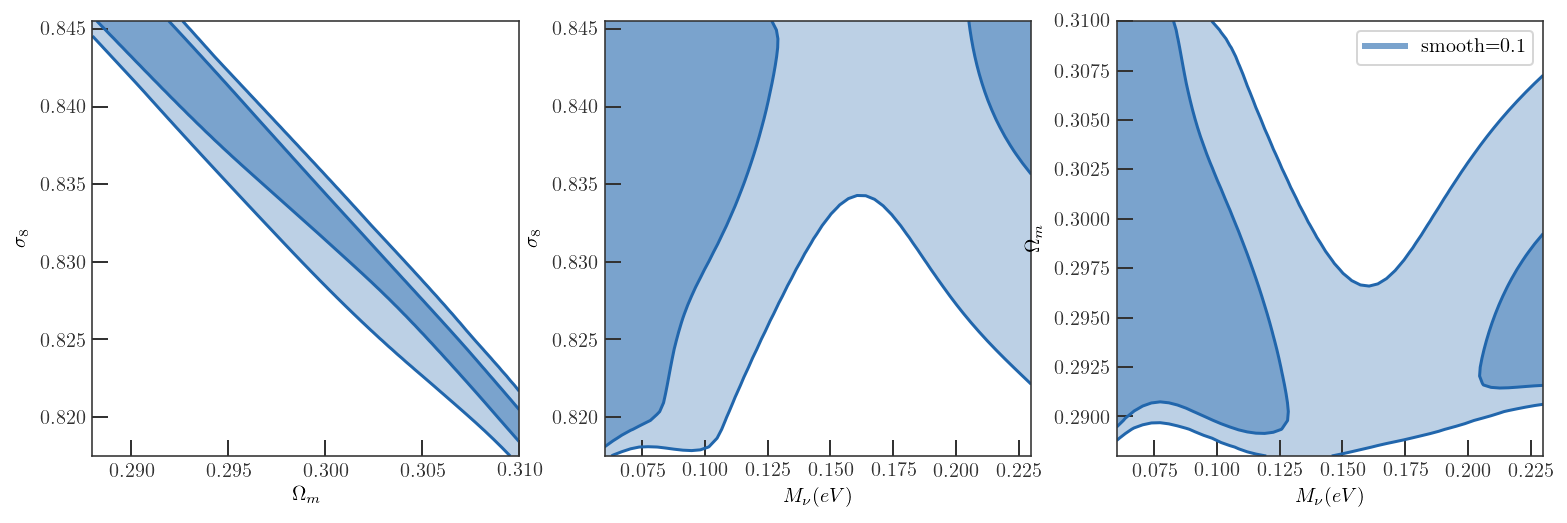

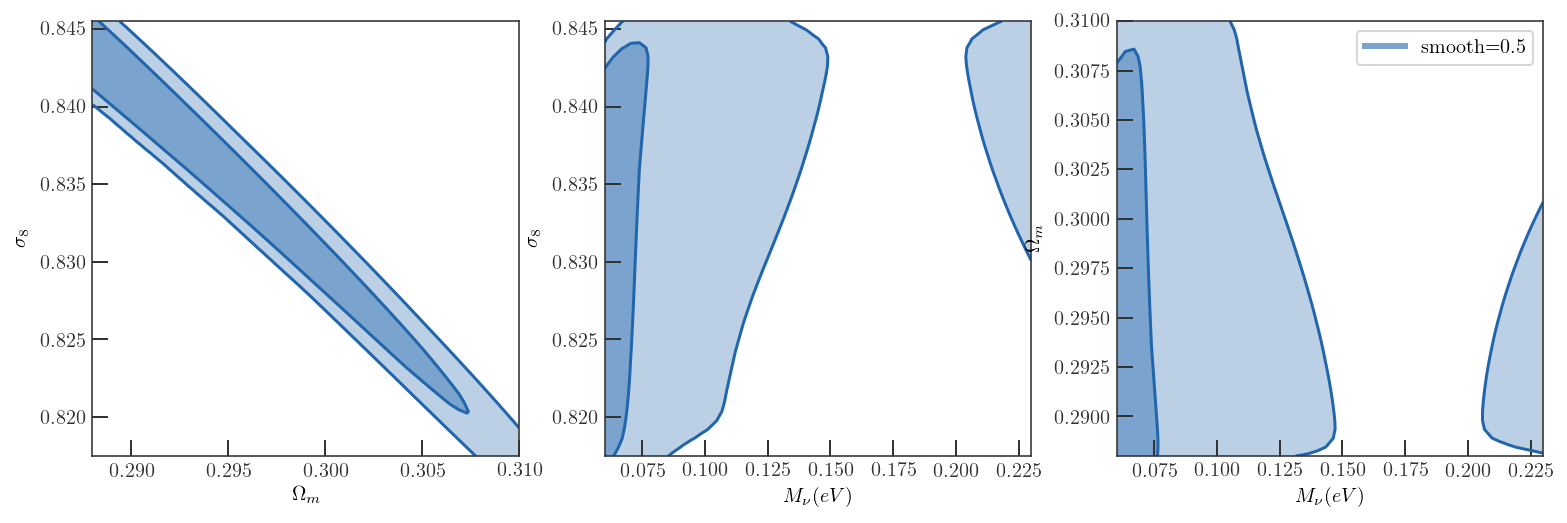

In [25]:
# 5 redshifts
x,y,z = np.load( 'cubes/' + 'smooth0.0' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'smooth0.0' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='smooth=0.0')
ax[-1].legend()

# 5 redshifts
x,y,z = np.load( 'cubes/' + 'smooth0.05' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'smooth0.05' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='smooth=0.05')

# 5 redshifts
x,y,z = np.load( 'cubes/' + 'smooth0.2' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'smooth0.2' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='smooth=0.1')
ax[-1].legend()

# 5 redshifts
x,y,z = np.load( 'cubes/' + 'smooth0.5' + '_PS_xyz.npy' )
c = np.load( 'cubes/' + 'smooth0.5' + '_PS.npy' )
fig, ax = plot_cube_getdist_style(c, [x,y,z],fill=True, 
                        input_color=colorlist[1],
                       input_label='smooth=0.5')
ax[-1].legend()

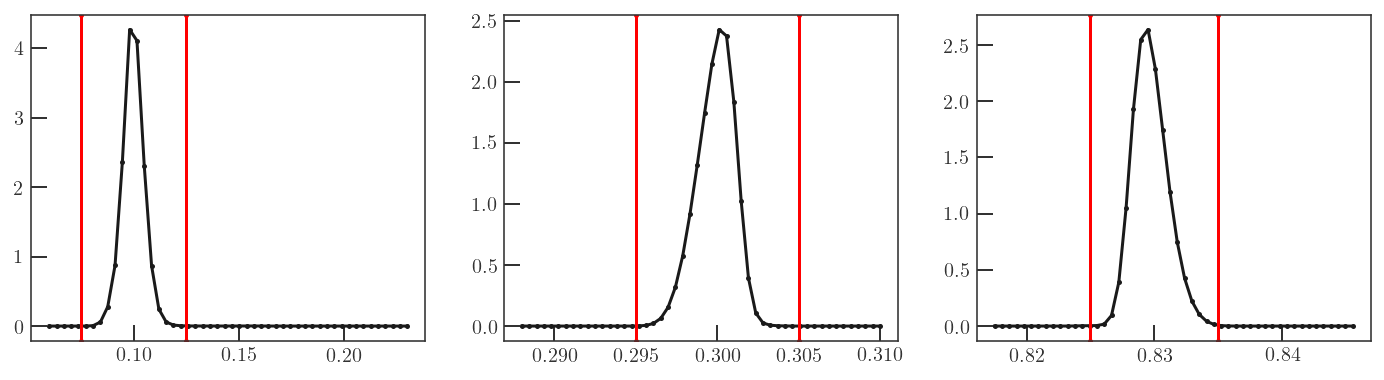

In [14]:
fig, axes = plt.subplots(1,3, figsize=(12,3))

cc = c2
axes[0].plot( x, np.sum(np.sum(cc,axis=1),axis=1) )
axes[0].axvline( 0.1 - 0.025, color='r' )
axes[0].axvline( 0.1 + 0.025, color='r' )

axes[1].plot( y, np.sum(np.sum(cc,axis=0),axis=1) )
axes[1].axvline( 0.3 + 0.005, color='r' )
axes[1].axvline( 0.3 - 0.005, color='r' )


axes[2].plot( z, np.sum(np.sum(cc,axis=0),axis=0) )
axes[2].axvline( 0.83 + 0.005, color='r' )
axes[2].axvline( 0.83 - 0.005, color='r' )

# Testing my Plotter
I'm not totally sure if my plotter is doing the right thing. I'm going to define a shape that is 

1. a cylinder with radius 2 axis along z.


In [52]:
nres = 100
x = np.linspace(-6, 6, nres)
y = np.linspace(-6, 6, nres)
z = np.linspace(-6, 6, nres)

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
input_param_list = list(zip(np.ravel(X), np.ravel(Y), np.ravel(Z)))

def color_in( inputs ):
    xx, yy, zz = inputs
    return (xx**2. + yy**2. < 4.0**2)

if __name__ == '__main__':
    pool = Pool(16)
    test_cube = np.array(pool.map(color_in, input_param_list))
    test_cube = test_cube.reshape(X.shape)
    pool.close()


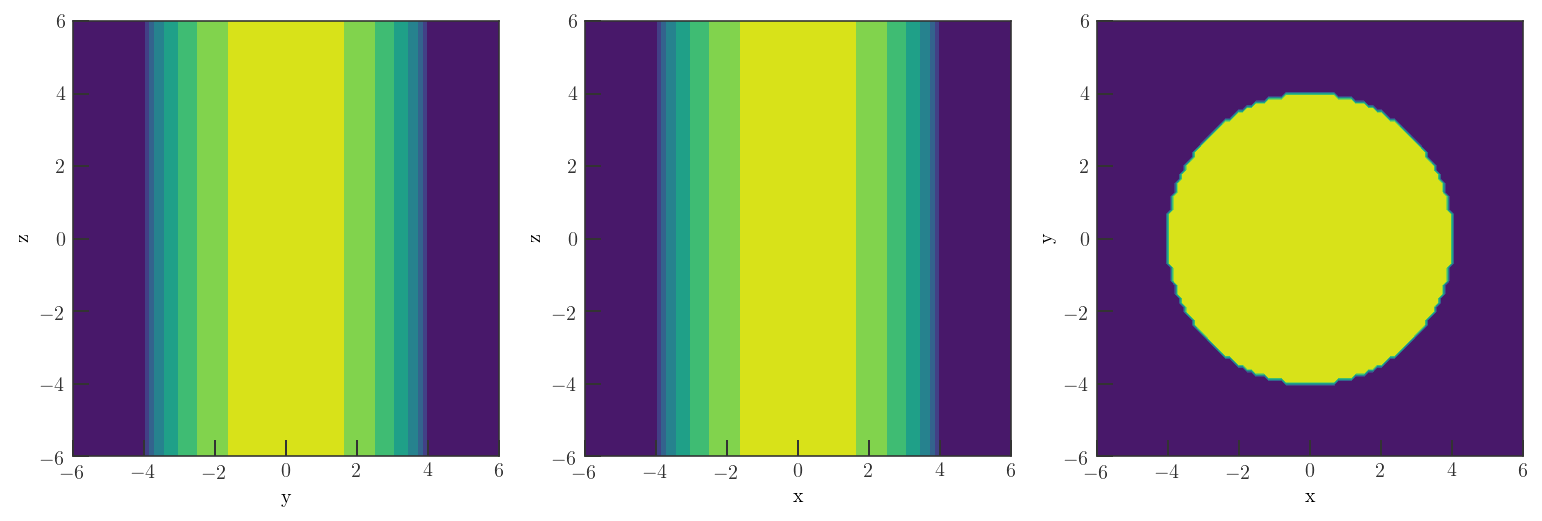

In [53]:
import importlib
import forecast
importlib.reload(forecast)
from forecast import plot_cube

fig, ax = plot_cube(test_cube, [x,y,z],fill=True, label_list=['x','y','z'])

an ellipse with $a=3$, $b=2$, $c=4$.

In [54]:
nres = 100
x = np.linspace(-6, 6, nres)
y = np.linspace(-6, 6, nres)
z = np.linspace(-6, 6, nres)

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
input_param_list = list(zip(np.ravel(X), np.ravel(Y), np.ravel(Z)))

def color_in( inputs ):
    xx, yy, zz = inputs
    return (xx/3.)**2. + (yy/2.)**2. + (zz/4.0)**2. < 1.

if __name__ == '__main__':
    pool = Pool(16)
    test_cube = np.array(pool.map(color_in, input_param_list))
    test_cube = test_cube.reshape(X.shape)
    pool.close()


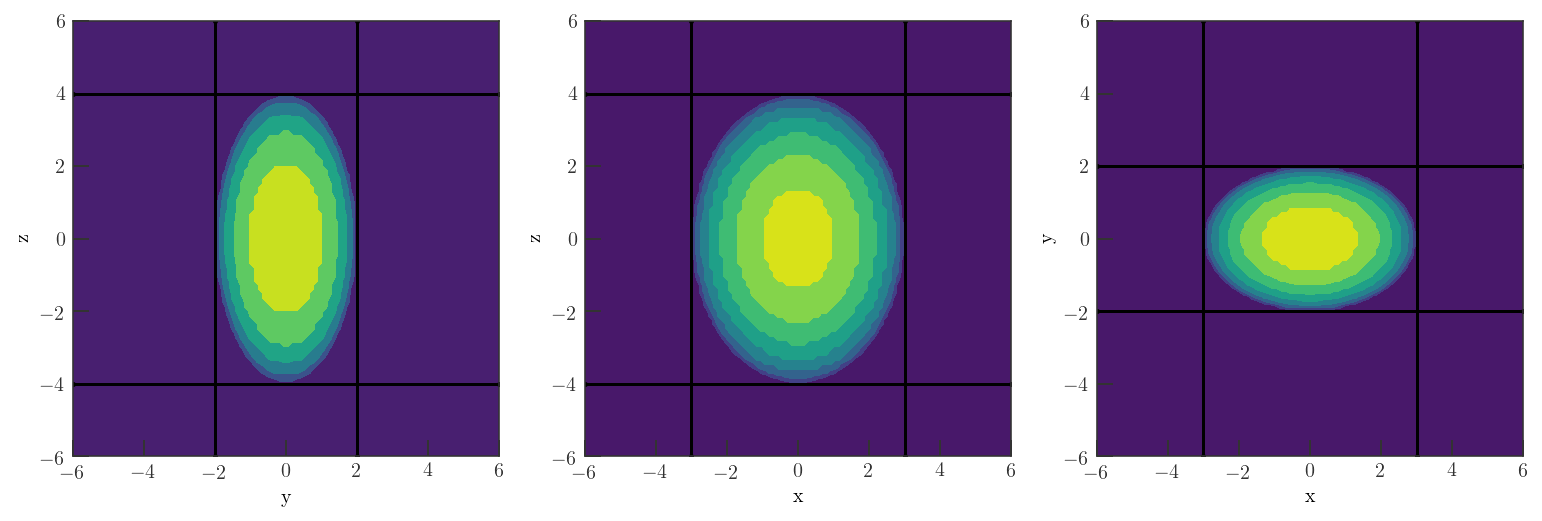

In [60]:
import importlib
import forecast
importlib.reload(forecast)
from forecast import plot_cube

fig, ax = plot_cube(test_cube, [x,y,z],fill=True, label_list=['x','y','z'])
ax[0].axvline( -2 ); ax[0].axvline( 2 )# y in yz plane
ax[0].axhline( -4 ); ax[0].axhline( 4 )# z in yz plane

ax[1].axvline( -3 ); ax[1].axvline( 3 )# x in xz plane
ax[1].axhline( -4 ); ax[1].axhline( 4 )# z in xz plane

ax[2].axvline( -3 ); ax[2].axvline( 3 )# x in xy plane
ax[2].axhline( -2 ); ax[2].axhline( 2 )# y in xy plane
